# Play Store Apps Visualized
### Dataset obtained from :- https://www.kaggle.com/lava18/google-play-store-apps is visualized on this Notebook
#### This dataset contains information of 10k apps on Play Store. Purpose of this Notebook is to analyze and describe the Play Store market.

First we will import required libraries. Pandas for dataset manipulaton, Matplotlib for visualizing data and Seaborn to beautify the graph.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the csv file on dataframe df and viewing dataset.

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


 First we need to change Size and Installs value to integer

In [3]:
df_temp = df[["Size","Installs"]]
df_temp["Size"] = df_temp["Size"].str.replace('M', '')
df_temp["Installs"] = df_temp["Installs"].str.replace(',','')
df_temp["Installs"] = df_temp["Installs"].str.replace('+','')
df_temp = df_temp.apply(pd.to_numeric, errors='coerce')
df_temp = df_temp.dropna(axis = 0)
df['Installs'] = df_temp['Installs']
df['Size'] = df_temp['Size']
df_temp.head()

,Size,Installs
0,19.0,10000
1,14.0,500000
2,8.7,5000000
3,25.0,50000000
4,2.8,100000


Before we analyze Play Store market i.e which sort of apps is successful, we have to look at our dataset. What type of data we are dealing with will helps us draw the conclusion. 

Lets plot no. of installs and no. of apps to get sense of the dataset.

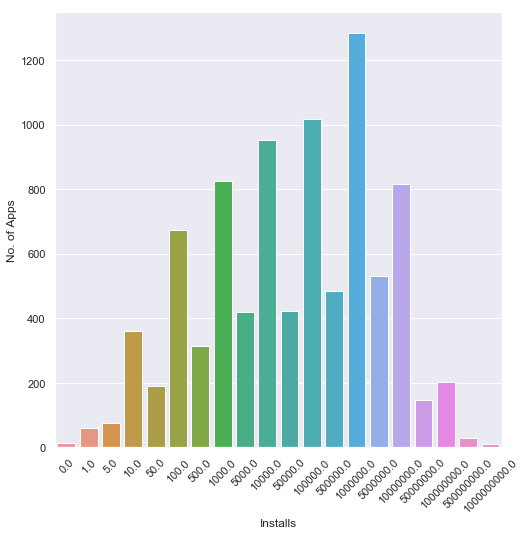

In [4]:
df_inst = df[['Installs']]
df_inst = df_inst.groupby('Installs').size().to_frame().reset_index()
df_inst.columns.values[1] = 'No. of Apps'
sns.set(rc={'figure.figsize':(8,8)})
sns.barplot(data = df_inst, x='Installs',y='No. of Apps')
plt.xticks(rotation=45)
plt.show()
sns.reset_defaults()

As we can see this dataset doesn't represet actual play store data. It contains more apps which is 'successful' than 'unsuccesful' ones. But in actuality in the sea of apps on playstore, 'successful' apps are comparatively less. Lets define 'what kind of apps are successul'. For the sake of simplicity I will define successful apps as::
1. Free apps having greater than or equals to 10k installs.
2. Paid apps having greater than or equals to 1k installs.

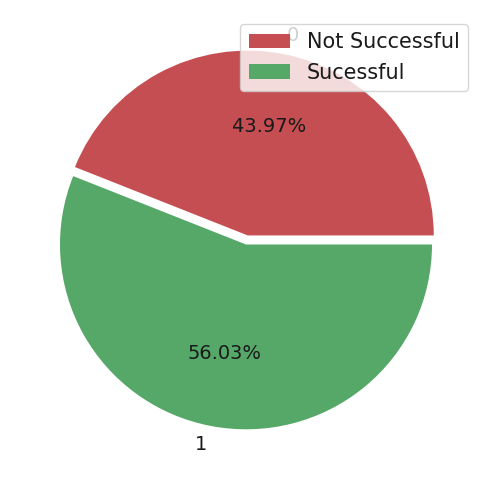

,Is Success,Freq
0,False,4766
1,True,6074


In [32]:
df_succ = df[['Type','Installs']]
df_succ['Is Success'] = ((df_succ['Type'] == 'Free') & (df_succ['Installs']>=10000) | (df_succ['Type'] == 'Paid') & (df_succ['Installs']>=1000))
df_succ['Is Success'] = df_succ['Is Success']
df_succ = df_succ.groupby("Is Success").size().to_frame().reset_index()
df_succ.columns.values[1] = 'Freq'
df_succ.plot.pie(y='Freq',colors=['r','g'],autopct='%0.2f%%',figsize = (6,6),explode=(0.05,0),textprops={'fontsize': 14})
plt.legend(["Not Successful","Sucessful"],fontsize=15)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)
plt.show()
df_succ

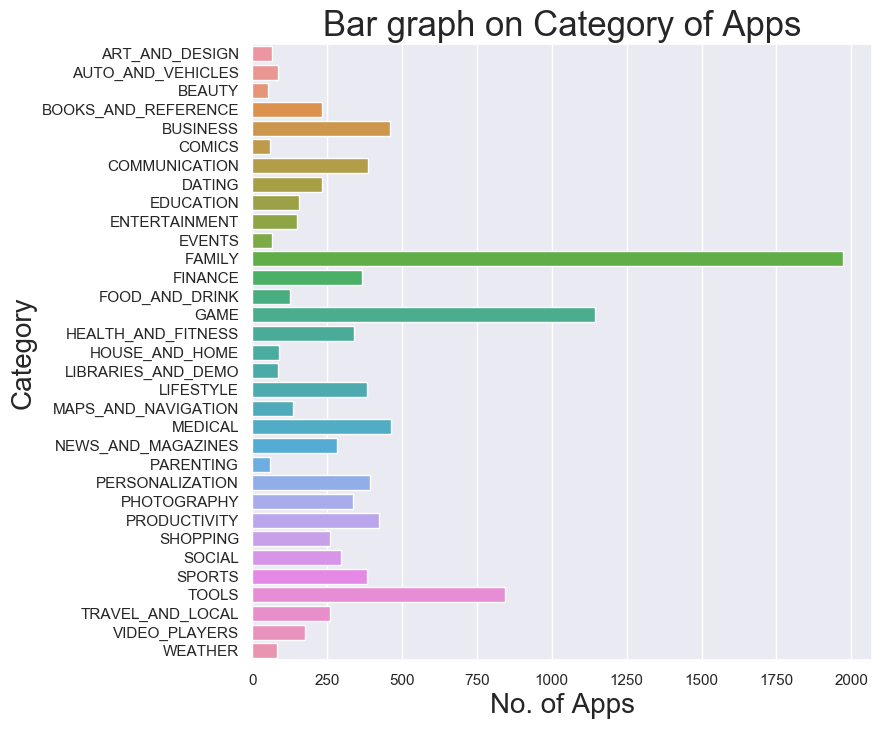

In [20]:
df_cat = df[["Category"]]
df_cat = df_cat.groupby("Category").size().to_frame().reset_index()
df_cat.columns.values[1] = 'freq'
df_cat.head()
sns.set(rc={'figure.figsize':(8,8)})
sns.barplot(data = df_cat, x ='freq', y= 'Category')
plt.title("Bar graph on Category of Apps",fontsize = 25)
plt.xlabel("No. of Apps",fontsize=20)
plt.ylabel("Category",fontsize=20)
plt.show()
sns.reset_defaults()

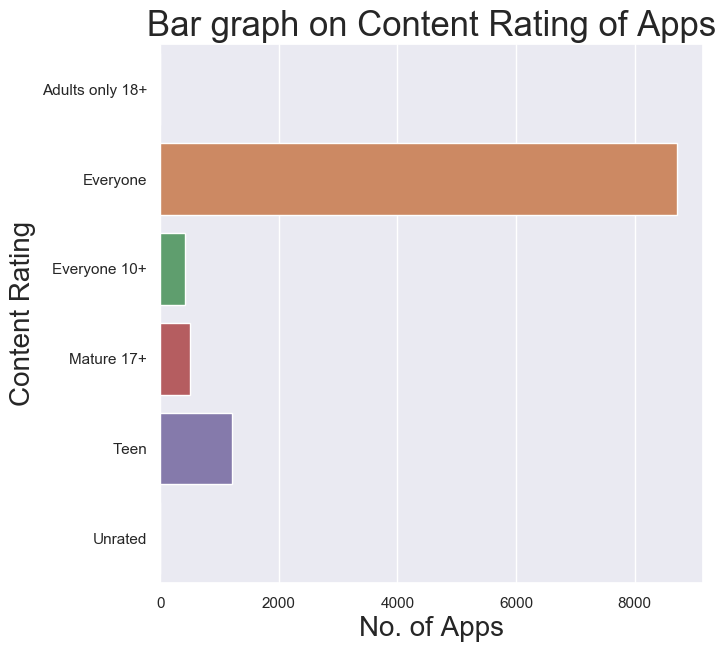

In [23]:
df_cont = df[["Content Rating"]]
df_cont = df_cont.groupby("Content Rating").size().to_frame().reset_index()
df_cont.columns.values[1] = 'freq'
df_cont.head()
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(data = df_cont, x ='freq', y= 'Content Rating')
plt.title("Bar graph on Content Rating of Apps",fontsize = 25)
plt.xlabel("No. of Apps",fontsize=20)
plt.ylabel("Content Rating",fontsize=20)
plt.show()
sns.reset_defaults()

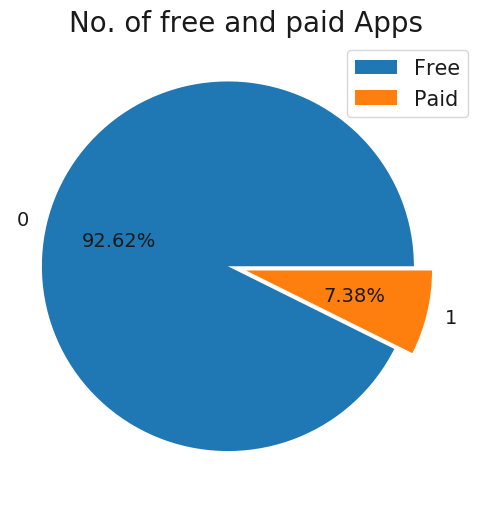

In [30]:
df_typenum = df[["Type"]]
df_typenum = df_typenum.groupby("Type").size().to_frame().reset_index()
df_typenum.columns.values[1] = 'freq'
#plt.subplot(121)
df_typenum.plot.pie(y= "freq",autopct='%0.2f%%',figsize = (6,6),explode=(0.1,0),textprops={'fontsize': 14})
plt.title("No. of free and paid Apps",fontsize=20)
plt.legend(['Free','Paid'],fontsize=15)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)
plt.show()

Text(0,0.5,'')

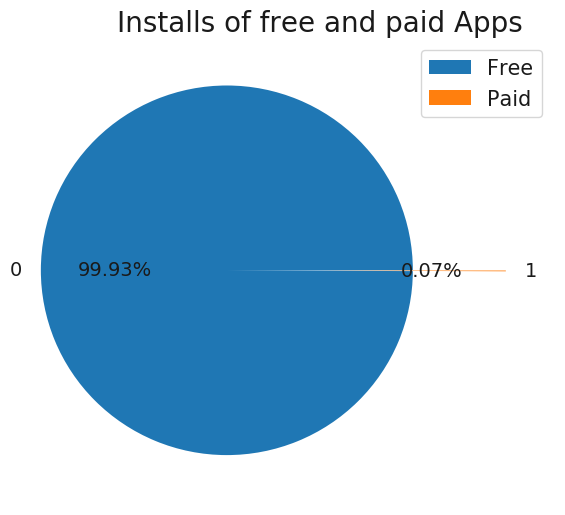

In [30]:
df_typedown = df[['Type','Installs']]
df_typedown = df_typedown.groupby('Type').sum().reset_index()
df_typedown.plot.pie(y="Installs",autopct='%0.2f%%',figsize = (6,6),explode=(0.5,0),textprops={'fontsize': 14})
plt.title("Installs of free and paid Apps",fontsize=20)
plt.legend(['Free','Paid'],fontsize=15)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)

In [11]:
df_sizinst = df[['Size','Installs']].groupby(['Size','Installs']).size().reset_index()
df_sizinst.columns.values[2] = 'freq'
df_sizinsfreq = df[['Size']].groupby("Size").size().to_frame().reset_index()
df_sizains = df[['Size','Installs']].groupby("Size").mean().reset_index()


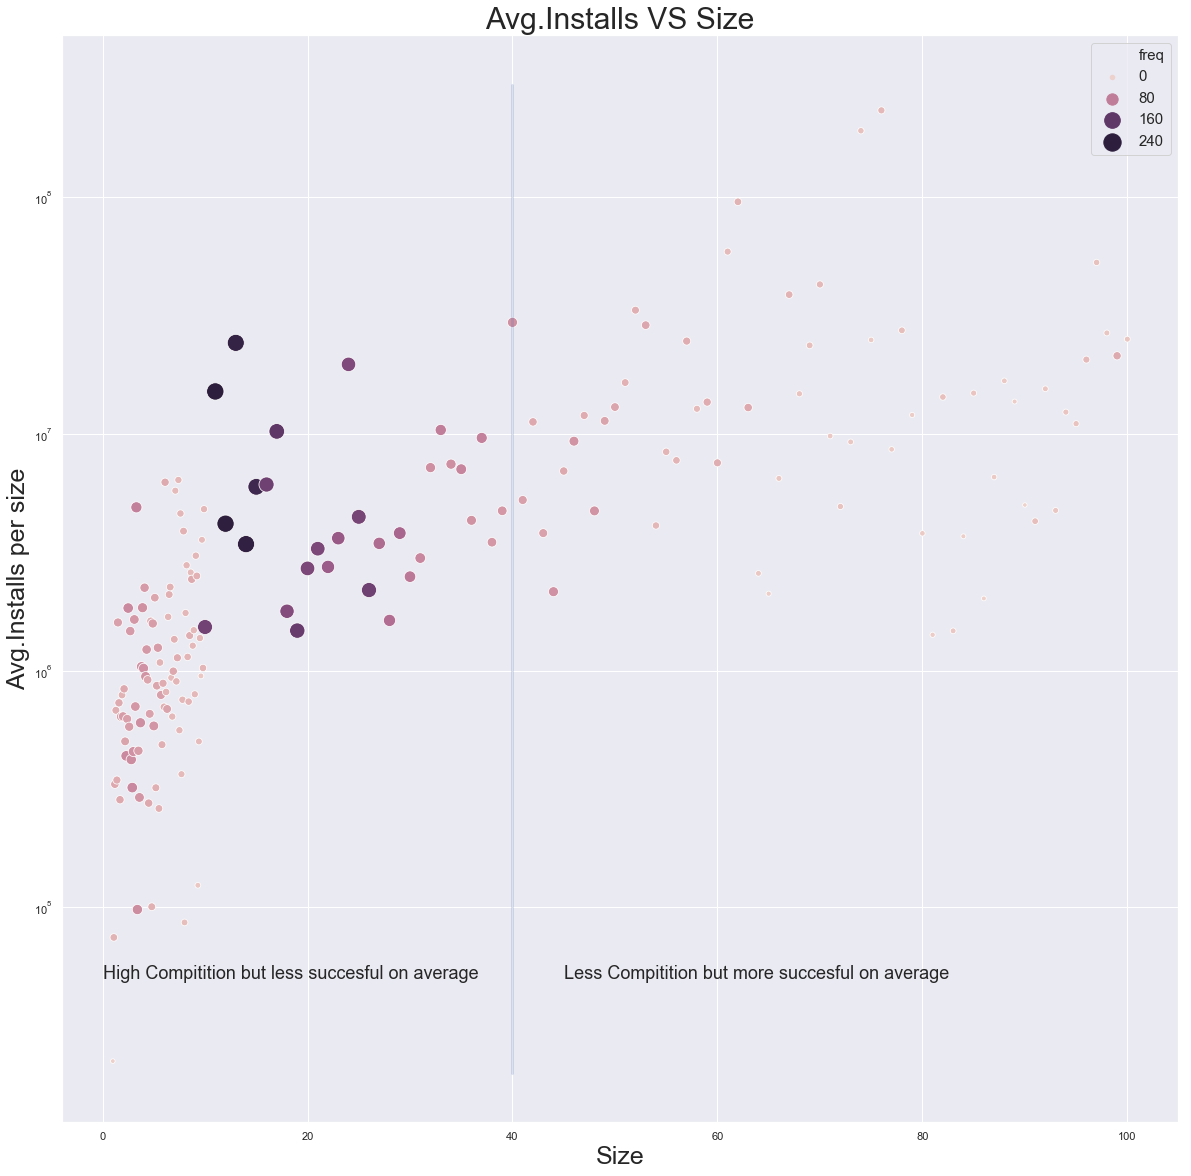

In [13]:
df_sizains = df[['Size','Installs']].groupby("Size").mean().reset_index()
df_sizains['freq'] = df_sizinsfreq[0]
plt.yscale("log")
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.scatterplot(data = df_sizains, x="Size",y="Installs",size = df_sizains['freq'],sizes=(20, 300),alpha = 1,hue='freq')
ax.axes.set_title("Avg.Installs VS Size",fontsize="30")
plt.legend(fontsize=15)
plt.xlabel("Size",fontsize=25)
plt.ylabel("Avg.Installs per size",fontsize=25)
plt.plot([40, 40], [20e3, 30e7], linewidth=3,color='b',alpha = 0.2)
plt.annotate("High Compitition but less succesful on average",xy=(0,50e3),fontsize=18)
plt.annotate("Less Compitition but more succesful on average",xy=(45,50e3),fontsize=18)
plt.show()